# 주성분 분석

차원 
- 데이터가 가진 속성 / 특성 = 차원 
- 아까 10,000개의 특성 = 차원이 이쓴데 이 차원을 줄일 수 있으면 용량을 줄일 수 있다 
- 

벡터
- 원소의 갯수


차원축소
- 선형모델에서 특성이 많아지면 과대적합이 되는 것을 배움 
- 데이터 가장 잘 나타내는 일부 특성을 선택해 데이터 크기 줄이고 학습 모델 성능 향상 가능 

##주성분 분석 = PCA

주성분 분석
- 데이터에 있는 분산이 큰 방향을 찾는것 
- 분산 : 데이터가 퍼져있는 정도 
- 벡터 : 분산이 큰 방향 ... 분산이 큰 방향을 찾는 것이 중요 -> 이 벡터를 주성분이라고 함 

- 주성분 : 원본 데이터에 있는 어떤 방향 // 주성분 벡터의 원소 갯수는 원본 데이터셋 특성 갯수와 같음 
- 주성분은 원본 차원과( 특성 ) 과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다! 
주성분이 가장 분산이 큰방향이니까 주성분에 투영하여 바꾼 데이터는 원본의 특성을 가장 잘 나타낸다 


## PCA 클래스

In [27]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-01-13 06:13:04--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-01-13 06:13:04--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-01-13 06:13:05--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [28]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [29]:
from sklearn.decomposition import PCA

#n_components : 주성분의 갯수 지정 
pca = PCA(n_components=50)

# 비지도니까 타깃값 x 
pca.fit(fruits_2d)

PCA(n_components=50)

In [30]:
print(pca.components_.shape)
# 위에서 주성분을 50으로 지정했으니 속성 50개로 지정됨 

(50, 10000)


In [31]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

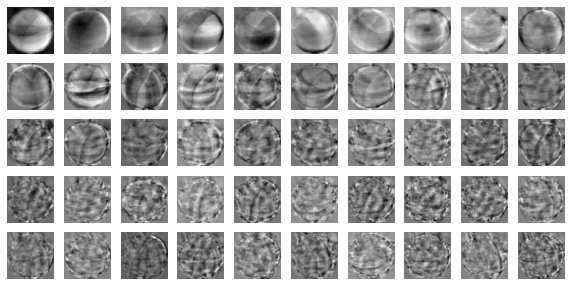

In [32]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

주성분은 원본데이터에서 가장 분산이 큰 방향을 순서대로 나타냄 
데이터셋에 있는 하나의 특징이라고 생각해도 무방 
주성분을 찾았으니 10,000개의 특성에서 50개로 줄이기 가능 

원본데이터를 주성분으로 분해 

In [33]:
print(fruits_2d.shape)

(300, 10000)


In [34]:
fruits_pca = pca.transform(fruits_2d)
# 원래는 300개의 샘플 , 10000개의 특성이었는데 주성분 찾은걸로 50개의 특성으로 transform()시킴

In [35]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [36]:
# 주성분으로 바꾸면 손실이 있을수도 있으니 원본데이터로 복구 할 떄 inberse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [37]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
# 10000개로 복원한거 3차원으로 바꾼다음 반환 

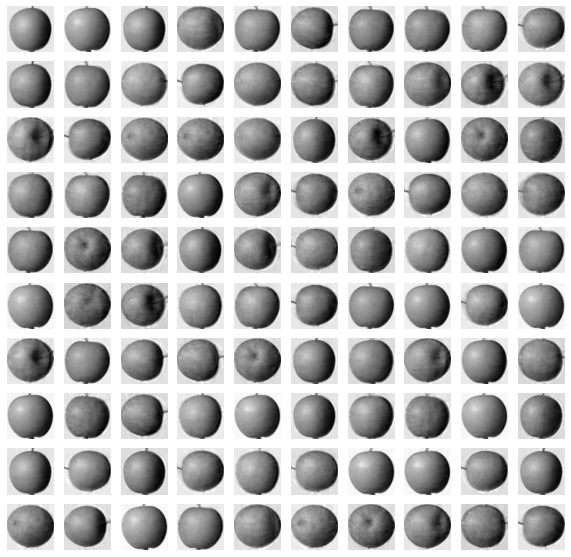

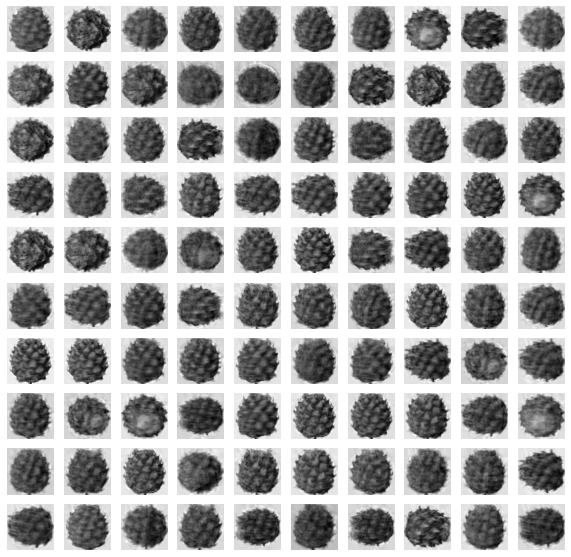

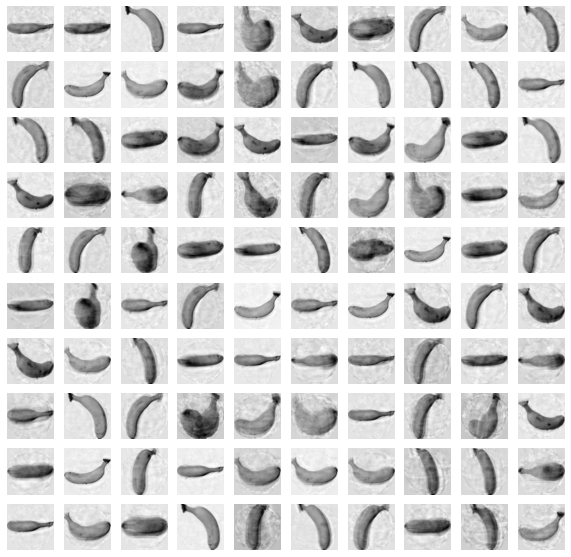

In [38]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타냈는지 기록한 값 
- pca클래스에서 explained_variance_ratio_에 각 주성분읜 분산 비율이 기록됨 
- 이 비율 다 더하면 50개 주성분으로 표현하고 있는 총 분산 비율 얻기 가능 

In [39]:
print(np.sum(pca.explained_variance_ratio_))
#92%가 넘는 분산비율 유지 중 

0.9215866055322336


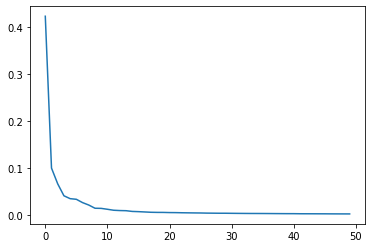

In [40]:
plt.plot(pca.explained_variance_ratio_)
# 10개까지가 대부분의 주성분을 가지고 있음 

## 다른 알고리즘과 함께 사용하기

In [41]:
from sklearn.linear_model import LogisticRegression

# 3개의 과일 사진 분류를 위해 로지스틱 회귀 모델 사용 
lr = LogisticRegression()

In [42]:
# 지도 학습 모델이니까 타깃값이 필요
# 사과0 파일애플 1 바나나2 
# 300개 생기도록 
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [43]:
from sklearn.model_selection import cross_validate

# 원본 데이터 
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4552956581115724


In [44]:
# 주성분 데이터로
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))

# 주성분으로 하니까 정확도가 100 훈련시간도 20배 빨라짐 
print(np.mean(scores['fit_time']))

1.0
0.03360438346862793


In [53]:
#PCA클래스 사용시 주성분 갯수 혹은 원하는 분산의 비율을 입력해도 ㄱㅊ
# PCA 클래스는 지정된 비율에 도달할 때까지  자동으로 주성분 찾음 
# 분산에 50%에 다라는 주성분 찾도록 지시ㅣ 
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [46]:
print(pca.n_components_)
# 2개의 주성분을 찾음 

2


In [47]:
fruits_pca = pca.transform(fruits_2d)
# 변환하니까 300개 샘플 특성은 딸랑 2개 
print(fruits_pca.shape)

(300, 2)


In [48]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 2개 썼는데도 정확도가 99? 머냐..

0.9933333333333334
0.05140066146850586


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [49]:
from sklearn.cluster import KMeans
# 차원 축소 된 거를 통해 K-평균 알고리즘으로 클러스터 찾기 
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [50]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


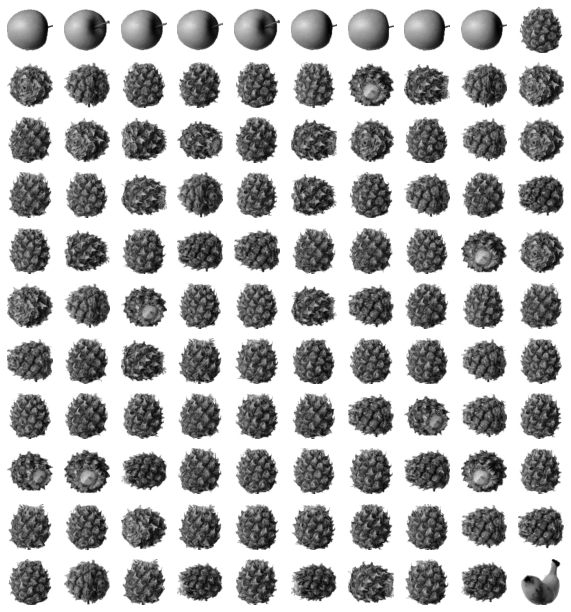

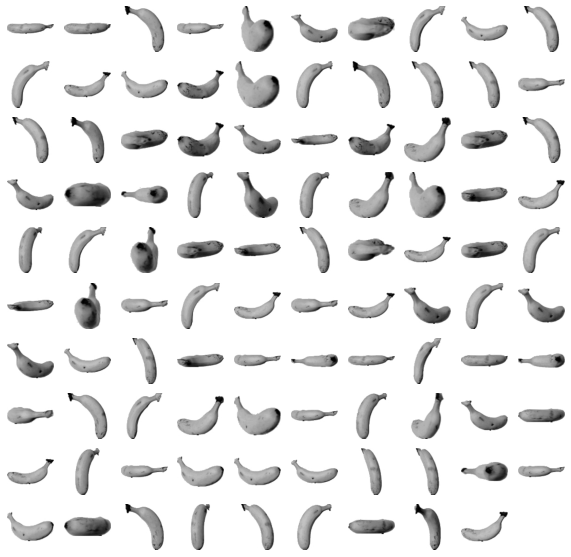

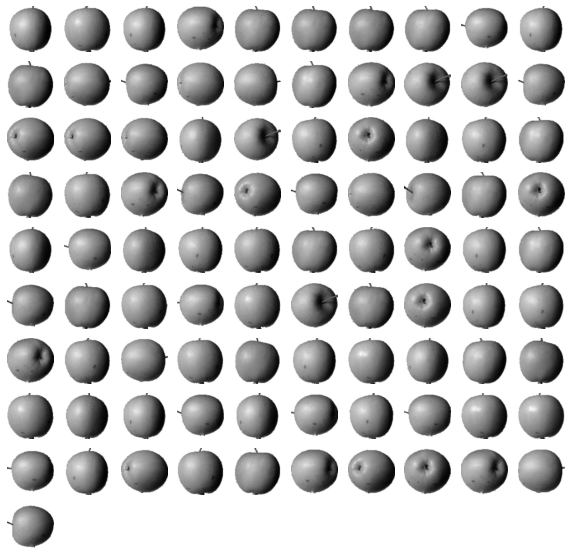

In [51]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

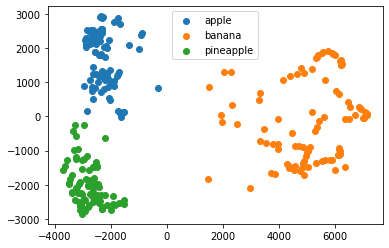

In [52]:
# 훈련 데이터의 차원을 3->2로 줄이면 화면에 출력하기 쉬움 
# fruit_pca 즉 주성분용 특성 2개 데이터셋은 2특성이니까 2차원 표현 가능 
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

차원축소
- 데이터 셋 크기 줄이고 시각화도 편안
- 축소된 데이터셋을 토대로 성능 높이거나 속도를 높이거나 

PCA
- 원래 픽셀 10000개가 각각 특성이었는데 가장 큰 분산 PCA 주성분을 통해서 특성을 50개로 크게 줄임 
- 특성 갯수는 적지만 원본 데이터의 90% 이상을 표현 = 설명된 분산 
- 자동으로 설명된 분산을 계산 혹은 명시적으로 주성분 갯수 지정하는 대신 비율을 지정해서 그 비율만큼 주성분 찾을 수 있음 